# Constructing Quantum Circuits with Quantum Gates

## Importing necessary libraries 

In [3]:
import qiskit
import numpy as np
from qiskit_aer import Aer
from qiskit.providers.basic_provider import BasicProvider
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram # 2D Histogram
from math import pi, sqrt # pi = 3.14 and square root operation

## NOT Gate

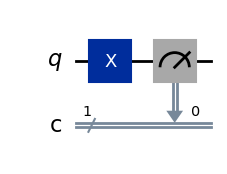

In [4]:
qc_not = QuantumCircuit(1,1,name="qc")

qc_not.x(0)

qc_not.measure(0,0)  

qc_not.draw('mpl')

In [5]:
# function to run a quantum simulation
def run_measurement(qc, do_transpile = False):
    # Use Aer's qasm_simulator
    backend = Aer.get_backend('qasm_simulator')
    
    # some gates are not available in qasm_simulator. For these, you need to transpile
    if do_transpile:
        qc = transpile(qc, backend=backend)
    # Execute the circuit 1000 times on the qasm simulator
    result = backend.run(qc, shots=1000).result()

    # Returns counts
    counts = result.get_counts(qc)
    print("\nTotal counts are:",counts)
    return counts


Total counts are: {'1': 1000}


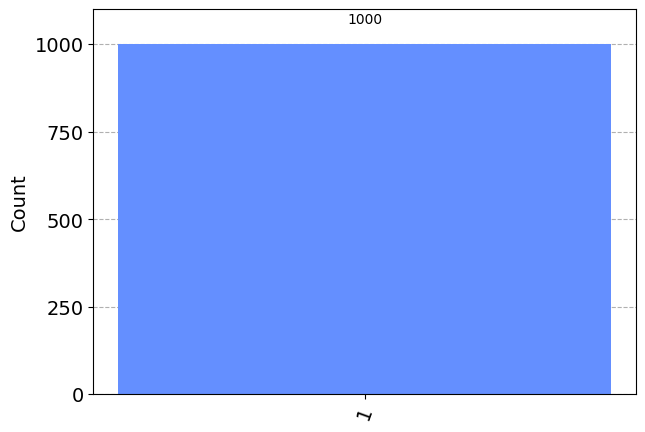

In [6]:
counts = run_measurement(qc_not)
# Plot a histogram
plot_histogram(counts)

## AND Gate

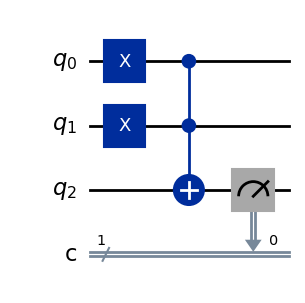

In [7]:
qc_and = QuantumCircuit(3,1,name="qc")

qc_and.x(0)
qc_and.x(1)

qc_and.ccx(0,1,2)

qc_and.measure(2,0)

qc_and.draw('mpl')


Total counts are: {'1': 1000}


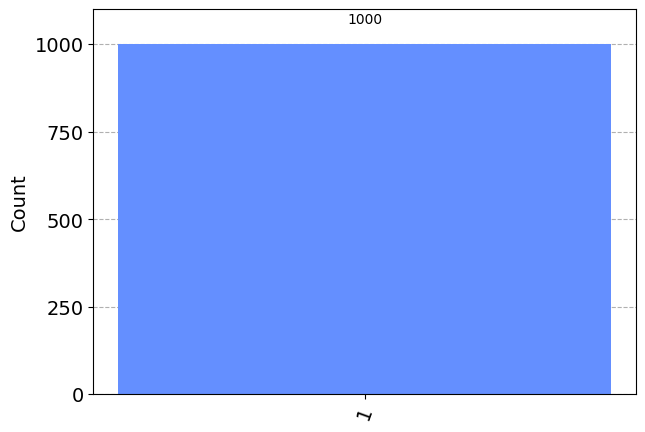

In [8]:
counts = run_measurement(qc_and)
# Plot a histogram
plot_histogram(counts)

## OR Gate


Total counts are: {'1': 1000}


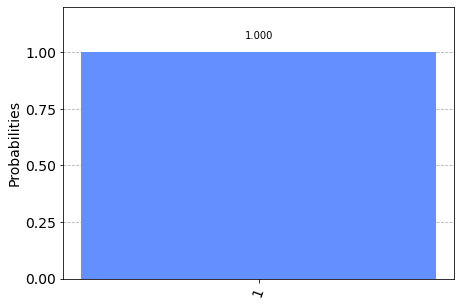

In [7]:
qc_or = QuantumCircuit(3,1,name="qc")

qc_or.x(0)
qc_or.x(1)

qc_or.cx(1, 2)
qc_or.cx(0, 2)
qc_or.ccx(0, 1, 2)

qc_or.measure(2, 0)

qc_or.draw('mpl')


Total counts are: {'1': 1000}


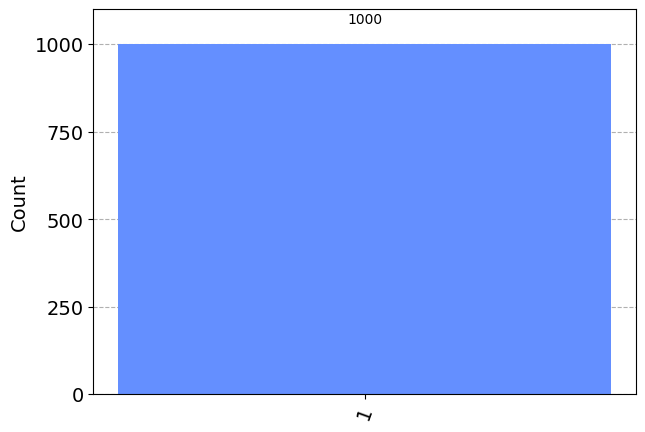

In [10]:
counts = run_measurement(qc_or)
# Plot a histogram
plot_histogram(counts)

## XOR Gate

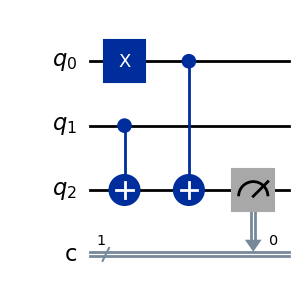

In [11]:
qc_xor = QuantumCircuit(3,1,name="qc")

qc_xor.x(0)
#qc_xor.x(1)

qc_xor.cx(1, 2)
qc_xor.cx(0, 2)

qc_xor.measure(2, 0)

qc_xor.draw('mpl')


Total counts are: {'1': 1000}


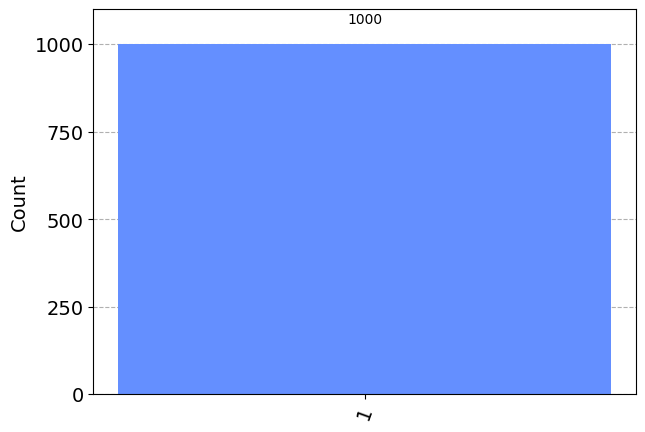

In [12]:
counts = run_measurement(qc_xor)
# Plot a histogram
plot_histogram(counts)

## NAND Gate

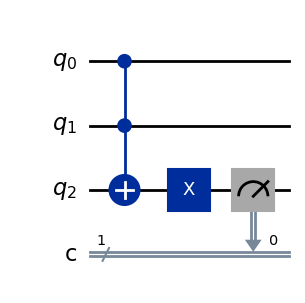

In [13]:
qc_nand = QuantumCircuit(3,1,name="qc")

qc_nand.ccx(0, 1, 2)
qc_nand.x(2)

qc_nand.measure(2, 0)

qc_nand.draw('mpl')


Total counts are: {'1': 1000}


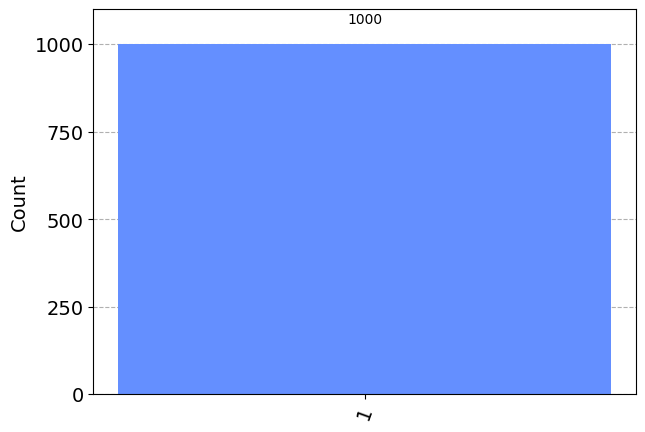

In [14]:
counts = run_measurement(qc_nand)
# Plot a histogram
plot_histogram(counts)

## Half Adder Circuit 

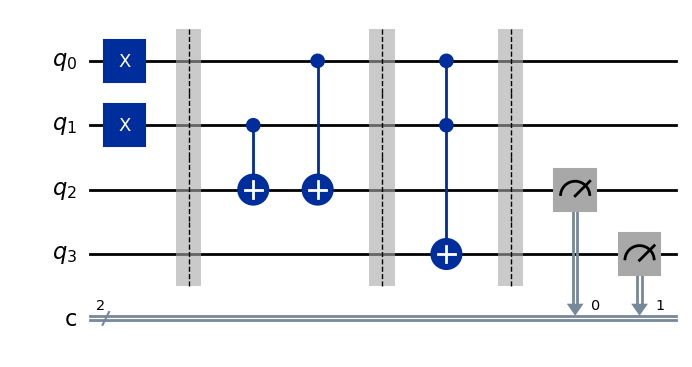

In [15]:
# Half Adder Circuit

qc_ha = QuantumCircuit(4,2,name="qc")

# Initialize qubits to |11>
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

#XOR
qc_ha.cx(1, 2)
qc_ha.cx(0, 2)
qc_ha.barrier()

#AND
qc_ha.ccx(0, 1, 3)
qc_ha.barrier()

#Sum
qc_ha.measure(2, 0)

#Carry out
qc_ha.measure(3, 1)

qc_ha.draw('mpl')


Total counts are: {'10': 1000}


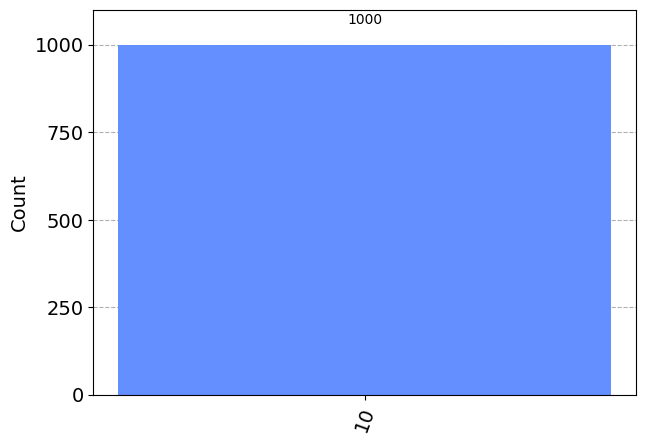

In [16]:
counts = run_measurement(qc_ha)
# Plot a histogram
plot_histogram(counts)